In [1]:
%load_ext autoreload
%autoreload 2


# Regresión con una red de 2 capas

Ahora que tenemos todos los elementos, podemos definir y entrenar nuestro primer modelo de red neuronal, de nuevo para estimar el precio de casas utilizando el conjunto de datos de [Casas de Boston](https://www.kaggle.com/c/boston-housing)


Dataset sizes: (506, 13) (506, 1)


fit:   0%|          | 0/1000 [00:00<?, ?it/s]

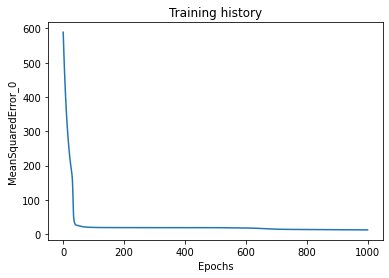

Error del modelo:
RMSE 2.555986712544188
MAE 2.555986712544188


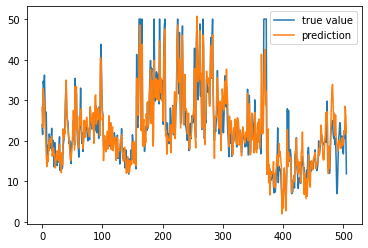

In [3]:
import simplenn as sn
import numpy as np
from simplenn import metrics,datasets

x,y=datasets.load_regression("boston")
x = (x-x.mean(axis=0))/x.std(axis=0)
n, din = x.shape
n, dout = y.shape
print("Dataset sizes:", x.shape,y.shape)

hidden_dim=10

#Red con dos capas lineales
model = sn.Sequential([sn.Dense(din,hidden_dim,activation_name="relu"),
                       sn.Dense(hidden_dim,dout,),
                      ])

error = sn.MeanError(sn.SquaredError())
optimizer = sn.StochasticGradientDescent(lr=0.001,epochs=1000,batch_size=32)

# Algoritmo de optimización
history = optimizer.optimize(model,x,y,error)
sn.plot.plot_history(history,error_name=error.name)


print("Error del modelo:")
y_pred=model.forward(x)
metrics.regression_summary(y,y_pred)
sn.plot.regression1d_predictions(y,y_pred)

# Comparación con Regresión Lineal

El modelo de 2 redes permite un modelo no lineal, y por ende ajustarse mejor a los datos. Comparemos con el resultado de una regresión lineal:

In [6]:

model=sn.LinearRegression(din,dout)
history = optimizer.optimize(model,x,y,error)
sn.plot.plot_history(history,error_name=error.name)

print("Error del modelo:")
y_pred=model.forward(x)
metrics.regression_summary(y,y_pred)
sn.plot.regression1d_predictions(y,y_pred)


fit:   0%|          | 0/1000 [00:00<?, ?it/s]

AttributeError: 'tuple' object has no attribute 'items'